#Neural Network & Deep learning | Project 1

This project has 2 case studies.

The first case study (described below - 30 points) covers concepts taught in Part 1 (first 8 hours of Neural networks basics).
 
1st case study - Project 1:
 
The case study is from an open source dataset from Kaggle. 

Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Given a Bank customer, can we build a classifier which can determine whether they will leave or not using Neural networks?

Case file: 

Dataset - bank.csv
 
The points distribution for this case is as follows:
1. Read the dataset in a new python notebook.
2. Drop the columns which are unique for all users like IDs (2.5 points)
3. Distinguish the feature and target set (2.5 points)
4. Divide the data set into Train and test sets
5. Normalize the train and test data (2.5 points)
6. Initialize &amp; build the model (10 points)
7. Optimize the model (5 points)
9. Predict the results using 0.5 as a threshold (5 points)
10. Print the Accuracy score and confusion matrix (2.5 points)



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 33kB/s 
     |████████████████████████████████| 3.8MB 32.7MB/s 
     |████████████████████████████████| 450kB 66.4MB/s 
     |████████████████████████████████| 81kB 11.1MB/s 
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: google-auth-oauthlib 0.4.0
    Uninstalling google-auth-oauthlib-0.4.0:
      Successfully uninstalled google-auth-oau

In [0]:
#%tensorflow_version 2.x
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
print(tf.__version__)
#From tensorflow v2.0 onwards, Eager Execution will be enabled by default

2.0.0


##1. Read the dataset in a new python notebook.


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
bank_data = pd.read_csv('/content/drive/My Drive/Great_Lakes_Assignments/08_Neural_Network_Deep_Learning_R6_Project1/bank.csv')

In [0]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
bank_data.shape

(10000, 14)

In [0]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###Insights
- We have 10000 rows and 14 features.
- Some of the features like Rownumber, CustomerId, Surname will not be useful for evaluation as they are unique for all users which does not describe any characteristics for our predictions. These features can be dropped.
- There are some features with object type. These features should be converted to category or Label encoding should be done before evaluation.
- The target feature Exited is of binary type (0 or 1)
- All the features have varied scale of measurement. Noramlization should be done before evaluation.

##2. Drop the columns which are unique for all users like IDs (2.5 points)

In [0]:
# Getting idea of unique values in our dataset 
for i  in bank_data.columns:
    print'Unique vlaues present in {} are : '.format(i),(bank_data[i].nunique())

Unique vlaues present in RowNumber are :  10000
Unique vlaues present in CustomerId are :  10000
Unique vlaues present in Surname are :  2932
Unique vlaues present in CreditScore are :  460
Unique vlaues present in Geography are :  3
Unique vlaues present in Gender are :  2
Unique vlaues present in Age are :  70
Unique vlaues present in Tenure are :  11
Unique vlaues present in Balance are :  6382
Unique vlaues present in NumOfProducts are :  4
Unique vlaues present in HasCrCard are :  2
Unique vlaues present in IsActiveMember are :  2
Unique vlaues present in EstimatedSalary are :  9999
Unique vlaues present in Exited are :  2


In [0]:
bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [0]:
bank_data.shape

(10000, 11)

In [0]:
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.4+ KB


In [0]:
# Lets convert the Geography and Gender to categorial.
bank_data["Geography"] = bank_data["Geography"].astype('category')
bank_data["Gender"] = bank_data["Gender"].astype('category')

bank_data["Geography"] = bank_data["Geography"].cat.codes
bank_data["Gender"] = bank_data["Gender"].cat.codes

bank_data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5919,645,2,1,49,8,0.00,2,1,0,162012.60,0
981,749,1,0,44,0,71497.79,2,0,0,151083.80,0
9750,708,0,0,51,8,70754.18,1,1,1,92920.04,1
3200,635,2,1,24,4,140197.18,1,1,1,142935.83,0
4892,707,1,0,51,10,98438.23,1,0,0,70778.63,1
7915,695,2,1,56,1,0.00,3,1,0,187734.49,1
8216,704,1,1,41,4,109026.80,2,1,1,43117.10,0
6627,558,0,0,41,6,0.00,1,1,1,143585.29,1
5243,780,1,0,37,10,95196.26,1,1,0,126310.39,1
9558,623,2,1,46,4,0.00,1,1,0,5549.11,1


In [0]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null int8
Gender             10000 non-null int8
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.7 KB


###Insights
- After dropping the irrelevant features, we are left with 10 features and a target.
- Also we have converted the Gender and Geography features to category codes.

##3. Distinguish the feature and target set (2.5 points)

In [0]:
#Feature set
X = bank_data.iloc[:,:-1]
#Target set
y = bank_data.iloc[:,-1]

In [0]:
X.shape

(10000, 10)

In [0]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [0]:
y.shape

(10000,)

In [0]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

##4. Divide the data set into Train and test sets

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [0]:
X_train.shape

(8000, 10)

In [0]:
X_test.shape

(2000, 10)

In [0]:
y_train.shape

(8000,)

In [0]:
y_test.shape

(2000,)

In [0]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3357,658,1,1,29,5,75395.53,2,0,1,54914.92
9793,772,1,0,42,0,101979.16,1,1,0,90928.48
6002,701,0,0,41,2,0.00,1,1,0,47856.78
5734,768,0,1,54,8,69712.74,1,1,1,69381.05
241,725,1,0,39,5,116803.80,1,1,0,124052.97


In [0]:
y_train.head()

3357    0
9793    0
6002    0
5734    0
241     0
Name: Exited, dtype: int64

In [0]:
print "Unique train labels: ", np.unique(y_train)

Unique train labels:  [0 1]


In [0]:
print "Unique test labels: ", np.unique(y_test)

Unique test labels:  [0 1]


##5. Normalize the train and test data (2.5 points)

In [0]:
from scipy import stats

X_train_Nor = stats.zscore(X_train) 
X_test_Nor = stats.zscore(X_test)
print('Normalization Done')

Normalization Done


In [0]:
X_train_Nor.shape

(8000, 10)

In [0]:
#We will have to convert train and test labels into one-hot vectors.
y_train_OH = tf.keras.utils.to_categorical(y_train)
y_test_OH = tf.keras.utils.to_categorical(y_test)

In [0]:
y_train[:20]

3357    0
9793    0
6002    0
5734    0
241     0
5001    0
402     0
4101    0
870     0
9464    0
732     0
4459    0
9719    1
5694    0
8966    0
7406    0
46      1
3807    0
3602    0
1493    0
Name: Exited, dtype: int64

In [0]:
y_train_OH[:20]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

##6. Initialize &amp; build the model (10 points)

In [0]:
# Import the necessary layers from keras to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
# Build a neural Network with a binary crossentropy loss function and sgd optimizer in Keras. The output layer with 2 neurons.

#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = Sequential()

#Add Dense/Input layer
model.add(Dense(10, input_dim = 10, activation='relu'))

#Add Dense Layer which provides 2 Output after applying sigmoid (Output Layer)
model.add(Dense(2, activation='sigmoid'))

In [0]:
#Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

### Execute the model

In [0]:
#Train the model
model.fit(X_train_Nor,y_train_OH, validation_data=(X_test_Nor,y_test_OH), epochs=15, batch_size=10)

Train on 8000 samples, validate on 2000 samples
Epoch 1/15
8000/8000 [==============================] - 2s 208us/sample - loss: 0.5692 - accuracy: 0.7303 - val_loss: 0.4941 - val_accuracy: 0.8035
Epoch 2/15
8000/8000 [==============================] - 1s 150us/sample - loss: 0.4686 - accuracy: 0.8076 - val_loss: 0.4541 - val_accuracy: 0.8138
Epoch 3/15
8000/8000 [==============================] - 1s 148us/sample - loss: 0.4421 - accuracy: 0.8142 - val_loss: 0.4384 - val_accuracy: 0.8175
Epoch 4/15
8000/8000 [==============================] - 1s 150us/sample - loss: 0.4301 - accuracy: 0.8178 - val_loss: 0.4297 - val_accuracy: 0.8223
Epoch 5/15
8000/8000 [==============================] - 1s 149us/sample - loss: 0.4226 - accuracy: 0.8201 - val_loss: 0.4231 - val_accuracy: 0.8255
Epoch 6/15
8000/8000 [==============================] - 1s 156us/sample - loss: 0.4163 - accuracy: 0.8228 - val_loss: 0.4172 - val_accuracy: 0.8288
Epoch 7/15
8000/8000 [==============================] - 1s 149us

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


In [0]:
print ("Final Train Accuracy from model history: ", model.history.history['accuracy'][-1]*100)
print ("Final Test Accuracy from model history: ", model.history.history['val_accuracy'][-1]*100)

('Final Train Accuracy from model history: ', 85.26250123977661)
('Final Test Accuracy from model history: ', 84.54999923706055)


['loss', 'val_accuracy', 'val_loss', 'accuracy']


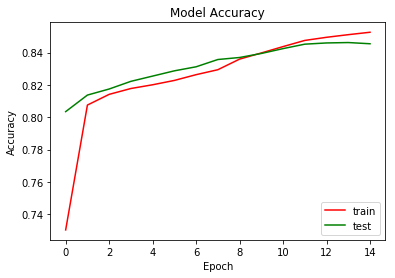

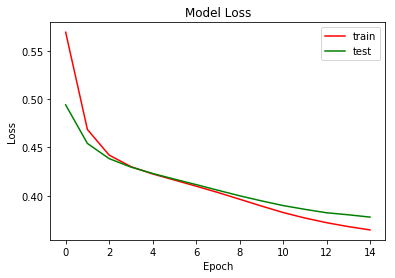

In [0]:
import matplotlib.pyplot as plt

# list all data in history
print(model.history.history.keys())

# Summary - History for accuracy
plt.plot(model.history.history['accuracy'], color = 'red')
plt.plot(model.history.history['val_accuracy'], color = 'green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Summary - History for loss

plt.plot(model.history.history['loss'], color = 'red')
plt.plot(model.history.history['val_loss'], color = 'green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

### Summary:
- As we have binary classification, we have used binary crossentropy for loss and sigmoid for activation in output layer.
- We have just tried with relu activation in input layer. We will find the best activation method using grid search.
- Same way we have tried with sgd optimizer. We will find the best optimizer using grid search.
The test accuracy we have got is 84.5499%

##7. Optimize the model (5 points)

In [0]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

- Lets first findout the best optimizer among 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'

In [0]:
#Setting up optimizers
sgd_opt = tf.keras.optimizers.SGD(lr=0.5, decay=1e-6, momentum=0.9, nesterov=True) #sgd_opt can be with momentum, nesterov or without, 2nd choice
rmsprop_opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) #almost similar to adadelta
adagrad_opt = tf.keras.optimizers.Adagrad(learning_rate=0.01) #solves problem of learning rate 4th choice and 5th choice sgd without momentum
adadelta_opt = tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95) #solves problem of learning rate gamma is to be set rho 3rd choice
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) #momentum and adadelta together approach. top choice
adamax_opt = tf.keras.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
nadam_opt = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

In [0]:
#Find out best optimizer

#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Function to create model, required for KerasClassifier

def create_model(optimizer='adam'):
  #Initialize Sequential model
  model_opt = Sequential()
  
  #Input Layer
  model_opt.add(Dense(10, input_dim = 10, activation='relu'))
  
  #Add Dense Layer which provides 1 Outputs after applying sigmoid (Output Layer)
  model_opt.add(Dense(1, activation='sigmoid'))
  
  #Compile the model
  model_opt.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  
  return model_opt

model_opt = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)


# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model_opt, param_grid=param_grid, n_jobs=-1, scoring="accuracy", cv=2)
grid_result = grid.fit(X_train_Nor, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.850375 using {'optimizer': 'Nadam'}
0.845125 (0.001625) with: {'optimizer': 'SGD'}
0.846875 (0.003375) with: {'optimizer': 'RMSprop'}
0.780250 (0.003000) with: {'optimizer': 'Adagrad'}
0.617875 (0.004625) with: {'optimizer': 'Adadelta'}
0.848250 (0.001250) with: {'optimizer': 'Adam'}
0.822125 (0.009625) with: {'optimizer': 'Adamax'}
0.850375 (0.000125) with: {'optimizer': 'Nadam'}


###From above we can see the best Optimizer is "Nadam" with Accuracy of 85.03%, we can see a slight increase in accuracy.

Lets find out the best learning rate.

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Here we will use best optimizer "Nadam" to find out best learning rate.
from tensorflow.keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(learning_rate=0.0001):
  #Initialize Sequential model
  model_lr = Sequential()
  #Input Layer
  model_lr.add(Dense(10, input_dim = 10, activation='relu'))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_lr.add(Dense(2, activation='sigmoid'))
  #Compile the model
  optimizer = Nadam(lr=learning_rate)
  model_lr.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model_lr

# create model
model_lr = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 1.0]
param_grid = dict(learning_rate=learning_rate)

grid = GridSearchCV(estimator=model_lr, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Nor, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854562 using {'learning_rate': 0.01}
0.846063 (0.000813) with: {'learning_rate': 0.001}
0.854562 (0.002562) with: {'learning_rate': 0.01}
0.847000 (0.000750) with: {'learning_rate': 0.1}
0.806625 (0.001625) with: {'learning_rate': 0.2}
0.795250 (0.003500) with: {'learning_rate': 0.3}
0.795625 (0.003875) with: {'learning_rate': 0.5}
0.795625 (0.003875) with: {'learning_rate': 1.0}


###So the best learning rate is 0.01 using Nadam as an optimizer

In [0]:
nadam_opt = tf.keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Tune the Neuron Activation Function for hidden layer

def create_model(activation='relu'):
  #Initialize Sequential model
  model_actf = Sequential()
  #Input Layer
  model_actf.add(Dense(10, input_dim = 10, activation=activation))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_actf.add(Dense(2, activation='sigmoid'))
  #Compile the model
  model_actf.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_actf

# create model
model_actf = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_actf, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Nor, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.860188 using {'activation': 'softmax'}
0.860188 (0.002438) with: {'activation': 'softmax'}
0.851750 (0.003750) with: {'activation': 'softplus'}
0.849125 (0.000250) with: {'activation': 'softsign'}
0.854375 (0.003250) with: {'activation': 'relu'}
0.850562 (0.000688) with: {'activation': 'tanh'}
0.841375 (0.000625) with: {'activation': 'sigmoid'}
0.835687 (0.004688) with: {'activation': 'hard_sigmoid'}
0.802813 (0.010188) with: {'activation': 'linear'}


#### As per above best activation function for hidden layer is "softmax" and we can see a slight increase in accuracy also

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Tune Network Weight Initialization

def create_model(init_mode='uniform'):
  #Initialize Sequential model
  model_nw = Sequential()
  #Input Layer
  model_nw.add(Dense(10, input_dim = 10, kernel_initializer = init_mode, activation='softmax'))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_nw.add(Dense(2, kernel_initializer = init_mode, activation='sigmoid'))
  #Compile the model
  model_nw.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_nw

# create model
model_nw = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

grid = GridSearchCV(estimator=model_nw, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Nor, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.859812 using {'init_mode': 'lecun_uniform'}
0.858625 (0.000750) with: {'init_mode': 'uniform'}
0.859812 (0.000313) with: {'init_mode': 'lecun_uniform'}
0.856063 (0.000187) with: {'init_mode': 'normal'}
0.795625 (0.003875) with: {'init_mode': 'zero'}
0.858813 (0.000188) with: {'init_mode': 'glorot_normal'}
0.859375 (0.000500) with: {'init_mode': 'glorot_uniform'}
0.858125 (0.003875) with: {'init_mode': 'he_normal'}
0.857687 (0.000437) with: {'init_mode': 'he_uniform'}


####As we can see the best weight initialization is lecun_uniform but the accuracy slightly reduced, so we will not specify activation of initail weights.

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Tune Dropout Regularization
# Tuning the dropout rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

from tensorflow.keras.layers import Dropout

def create_model(dropout_rate=0.0):
  #Initialize Sequential model
  model_do = Sequential()
  #Input Layer
  model_do.add(Dense(10, input_dim = 10, activation='softmax'))
  model_do.add(Dropout(dropout_rate))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_do.add(Dense(2, activation='sigmoid'))
  #Compile the model
  model_do.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_do

# create model
model_do = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
dropout_rate = [0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)

grid = GridSearchCV(estimator=model_do, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Nor, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

W0108 20:52:03.134722 139680191858560 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0108 20:52:03.252018 139680191858560 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0108 20:52:04.175364 139680191858560 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0108 20:52:12.690644 139680191858560 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0108 20:52:12.797996 139680191858560 nn_ops.py:4283] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Best: 0.857188 using {'dropout_rate': 0.0}
0.857188 (0.000313) with: {'dropout_rate': 0.0}
0.855500 (0.001875) with: {'dropout_rate': 0.1}
0.855000 (0.004000) with: {'dropout_rate': 0.2}
0.853625 (0.004000) with: {'dropout_rate': 0.25}
0.855500 (0.005125) with: {'dropout_rate': 0.3}
0.845688 (0.009687) with: {'dropout_rate': 0.4}
0.836375 (0.000375) with: {'dropout_rate': 0.5}
0.810875 (0.007375) with: {'dropout_rate': 0.6}
0.795625 (0.003875) with: {'dropout_rate': 0.7}
0.795625 (0.003875) with: {'dropout_rate': 0.75}
0.795625 (0.003875) with: {'dropout_rate': 0.8}
0.795625 (0.003875) with: {'dropout_rate': 0.9}


#### We can see overall dropout is not contributing to improvement of accuracy of the model, so we will not include dropout in our final model

In [0]:
# Tune the Number of Neurons in the Hidden Layer
# The number of neurons in a layer is an important parameter to tune. 
# Generally the number of neurons in a layer controls the representational capacity of the network, at least at that point in the topology.

#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Function to create model, required for KerasClassifier
def create_model(neurons=1):
  #Initialize Sequential model
  model_neu = Sequential()
  #Input Layer
  model_neu.add(Dense(neurons, input_dim = 10, activation='softmax'))
  #Add Dense Layer which provides 2 Outputs after applying sigmoid (Output Layer)
  model_neu.add(Dense(2, activation='sigmoid'))
  #Compile the model
  model_neu.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model_neu

# create model
model_neu = KerasClassifier(build_fn=create_model, epochs=15, batch_size=10, verbose=0)

# define the grid search parameters
neurons = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100]
param_grid = dict(neurons=neurons)

grid = GridSearchCV(estimator=model_neu, param_grid=param_grid, n_jobs=1, cv=2)
grid_result = grid.fit(X_train_Nor, y_train_OH)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857563 using {'neurons': 40}
0.855125 (0.000000) with: {'neurons': 5}
0.854875 (0.001125) with: {'neurons': 10}
0.854250 (0.000875) with: {'neurons': 15}
0.856875 (0.000375) with: {'neurons': 20}
0.855625 (0.001000) with: {'neurons': 25}
0.855312 (0.000312) with: {'neurons': 30}
0.854250 (0.000875) with: {'neurons': 35}
0.857563 (0.000937) with: {'neurons': 40}
0.855500 (0.000375) with: {'neurons': 45}
0.855937 (0.002187) with: {'neurons': 50}
0.855875 (0.001375) with: {'neurons': 55}
0.855875 (0.001625) with: {'neurons': 60}
0.855188 (0.000813) with: {'neurons': 100}


####Optimised no. of neuron are 40

In [0]:
# Tune Batch Size and Number of Epochs

#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Function to create model, required for KerasClassifier
def create_model():
  #Initialize Sequential model
  model_be = Sequential()
  
  #Input Layer
  model_be.add(Dense(40, input_dim = 10, activation='softmax'))
     
  #Add Dense Layer which provides 1 Outputs after applying sigmoid (Output Layer)
  model_be.add(Dense(1, activation='sigmoid'))
  
  #Compile the model
  model_be.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
  
  return model_be

# create model
model_be = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [10, 20, 30, 40, 50]
epochs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model_be, param_grid=param_grid, n_jobs=1, scoring="accuracy", cv=2)
grid_result = grid.fit(X_train_Nor, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.858875 using {'epochs': 90, 'batch_size': 50}
0.853875 (0.001375) with: {'epochs': 10, 'batch_size': 10}
0.856875 (0.001875) with: {'epochs': 20, 'batch_size': 10}
0.856875 (0.001625) with: {'epochs': 30, 'batch_size': 10}
0.856875 (0.000625) with: {'epochs': 40, 'batch_size': 10}
0.856125 (0.001125) with: {'epochs': 50, 'batch_size': 10}
0.853375 (0.002625) with: {'epochs': 60, 'batch_size': 10}
0.853750 (0.002750) with: {'epochs': 70, 'batch_size': 10}
0.850625 (0.003375) with: {'epochs': 80, 'batch_size': 10}
0.852875 (0.002625) with: {'epochs': 90, 'batch_size': 10}
0.848750 (0.001000) with: {'epochs': 100, 'batch_size': 10}
0.852750 (0.000750) with: {'epochs': 10, 'batch_size': 20}
0.858250 (0.001000) with: {'epochs': 20, 'batch_size': 20}
0.855875 (0.000125) with: {'epochs': 30, 'batch_size': 20}
0.858625 (0.001625) with: {'epochs': 40, 'batch_size': 20}
0.855500 (0.001000) with: {'epochs': 50, 'batch_size': 20}
0.854750 (0.001500) with: {'epochs': 60, 'batch_size': 20}
0

Number of Epochs & Batch Size = 90,50

###Final hyperparameters for optimization of the model are
- Optimizer = 'Nadam'
- Learning rate = 0.01
- Neuron Activation Function = "softmax"
- Network Weight Initialization = lecun_uniform 
- Dropout Regularization p = 0.0
- Number of Neurons in the Hidden Layer = 40
- Number of Epochs & Batch Size = 90 & 50


##Final Model Building based on above Optimised Hyperparameters

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

#Initialize Sequential model
final_model = Sequential()
  
#Input Layer
final_model.add(Dense(10, input_dim = 10, activation='softmax'))

#Dense Layer
final_model.add(Dense(40, activation='softmax'))

#Add Dense Layer which provides 2 Output after applying sigmoid (Output Layer)
final_model.add(Dense(2, activation='sigmoid'))
 
#Compile the model
final_model.compile(optimizer=nadam_opt, loss='binary_crossentropy', metrics=['accuracy'])
 
#Train the model 
final_model.fit(X_train_Nor, y_train_OH, validation_data=(X_test_Nor, y_test_OH), epochs=90, batch_size=50)

Train on 8000 samples, validate on 2000 samples
Epoch 1/90
8000/8000 [==============================] - 2s 296us/sample - loss: 0.5186 - accuracy: 0.7912 - val_loss: 0.4726 - val_accuracy: 0.7990
Epoch 2/90
8000/8000 [==============================] - 0s 41us/sample - loss: 0.4380 - accuracy: 0.7956 - val_loss: 0.4233 - val_accuracy: 0.7990
Epoch 3/90
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3969 - accuracy: 0.8166 - val_loss: 0.3959 - val_accuracy: 0.8455
Epoch 4/90
8000/8000 [==============================] - 0s 43us/sample - loss: 0.3731 - accuracy: 0.8524 - val_loss: 0.3813 - val_accuracy: 0.8490
Epoch 5/90
8000/8000 [==============================] - 0s 41us/sample - loss: 0.3608 - accuracy: 0.8572 - val_loss: 0.3728 - val_accuracy: 0.8575
Epoch 6/90
8000/8000 [==============================] - 0s 44us/sample - loss: 0.3545 - accuracy: 0.8578 - val_loss: 0.3692 - val_accuracy: 0.8558
Epoch 7/90
8000/8000 [==============================] - 0s 42us/sampl

In [0]:
final_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 82        
Total params: 632
Trainable params: 632
Non-trainable params: 0
_________________________________________________________________


In [0]:
print ("Final Train Accuracy from model history: ", final_model.history.history['accuracy'][-1]*100)
print ("Final Test Accuracy from model history: ", final_model.history.history['val_accuracy'][-1]*100)

('Final Train Accuracy from model history: ', 86.86875104904175)
('Final Test Accuracy from model history: ', 85.42500138282776)


['loss', 'val_accuracy', 'val_loss', 'accuracy']


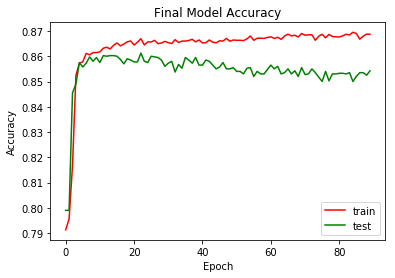

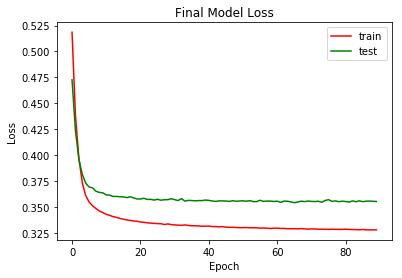

In [0]:
# list all data in history
print(final_model.history.history.keys())

# Summary - History for accuracy
plt.plot(final_model.history.history['accuracy'], color = 'red')
plt.plot(final_model.history.history['val_accuracy'], color = 'green')
plt.title('Final Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Summary - History for loss

plt.plot(final_model.history.history['loss'], color = 'red')
plt.plot(final_model.history.history['val_loss'], color = 'green')
plt.title('Final Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

##9. Predict the results using 0.5 as a threshold (5 points)

In [0]:
# make predictions for the testing set without threshold (default threshold is 0.5 for binary classification)
y_pred = final_model.predict(X_test_Nor)

In [0]:
print ("Prediction: ", y_pred[:20])

('Prediction: ', array([[0.53733885, 0.46370092],
       [0.97356164, 0.02629858],
       [0.68313164, 0.31699693],
       [0.9383532 , 0.06171945],
       [0.9384311 , 0.06214246],
       [0.895496  , 0.10472187],
       [0.98296857, 0.01693526],
       [0.8287723 , 0.17091003],
       [0.07778651, 0.92185605],
       [0.9762439 , 0.02362847],
       [0.97785497, 0.02205616],
       [0.8796732 , 0.12058455],
       [0.97937274, 0.02051529],
       [0.1814045 , 0.81853336],
       [0.90623194, 0.09401625],
       [0.7131336 , 0.28525165],
       [0.9426028 , 0.05718106],
       [0.501151  , 0.5001069 ],
       [0.86447656, 0.13574877],
       [0.8951452 , 0.10516706]], dtype=float32))


In [0]:
# Make predictions for the testing set with threshold 0.5
y_pred_threshold = (final_model.predict_proba(X_test_Nor) >= 0.5)

In [0]:
print ("Prediction: ", y_pred_threshold[:20])

('Prediction: ', array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True,  True],
       [ True, False],
       [ True, False]]))


##10. Print the Accuracy score and confusion matrix (2.5 points)

- Accuracy Scores for with and without threshold of 0.5

In [0]:
from sklearn import metrics

In [0]:
# Accuracy score for predictions with & without threshold
print "Accuracy score for predictions without thershold: ", metrics.accuracy_score(y_test_OH, y_pred.round())*100
print "Accuracy score for predictions with threshold of 0.5: ", metrics.accuracy_score(y_test_OH, y_pred_threshold)*100

Accuracy score for predictions without thershold:  85.39999999999999
Accuracy score for predictions with threshold of 0.5:  85.39999999999999


- Confusion Matrix

In [0]:
print ("Confusion Matrix for predictions without threshold")
pd.DataFrame(metrics.confusion_matrix(y_test_OH.argmax(axis=1), y_pred.argmax(axis=1)),
                 columns=['Predicted_Negative', 'Predicted_Negative'], index=['Negative', 'Positive'])

Confusion Matrix for predictions without threshold


,Predicted_Negative,Predicted_Negative
Negative,1531,67
Positive,224,178


In [0]:
print ("Confusion Matrix for predictions with specified threshold of 0.5")
pd.DataFrame(metrics.confusion_matrix(y_test_OH.argmax(axis=1), y_pred_threshold.argmax(axis=1)),
                 columns=['Predicted_Negative', 'Predicted_Negative'], index=['Negative', 'Positive'])

Confusion Matrix for predictions with specified threshold of 0.5


,Predicted_Negative,Predicted_Negative
Negative,1531,67
Positive,224,178


In [0]:
from sklearn.metrics import classification_report
print ("Classification Report for predictions without threshold")
print(classification_report(y_test_OH, y_pred.round()))

Classification Report for predictions without threshold
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1598
           1       0.72      0.44      0.55       402

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000
 samples avg       0.85      0.85      0.85      2000



In [0]:
print ("Classification Report for predictions with threshold of 0.5")
print(classification_report(y_test_OH, y_pred_threshold))

Classification Report for predictions with threshold of 0.5
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1598
           1       0.72      0.44      0.55       402

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000
 samples avg       0.85      0.85      0.85      2000



##Observations:
For binary classification by default the threshold is 0.5. So there is no difference in the accuracy score or classification report with and without specifying the 0.5 threshold.